<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 3 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 2.00</h2>
</center>

# Contexto


El elipsoide rotado es una superficie curva cerrada cuyas tres secciones ortogonales principales son elípticas, es decir, son originadas por planos que contienen dos ejes cartesianos cada plano. Como se observa en el siguiente gráfico.

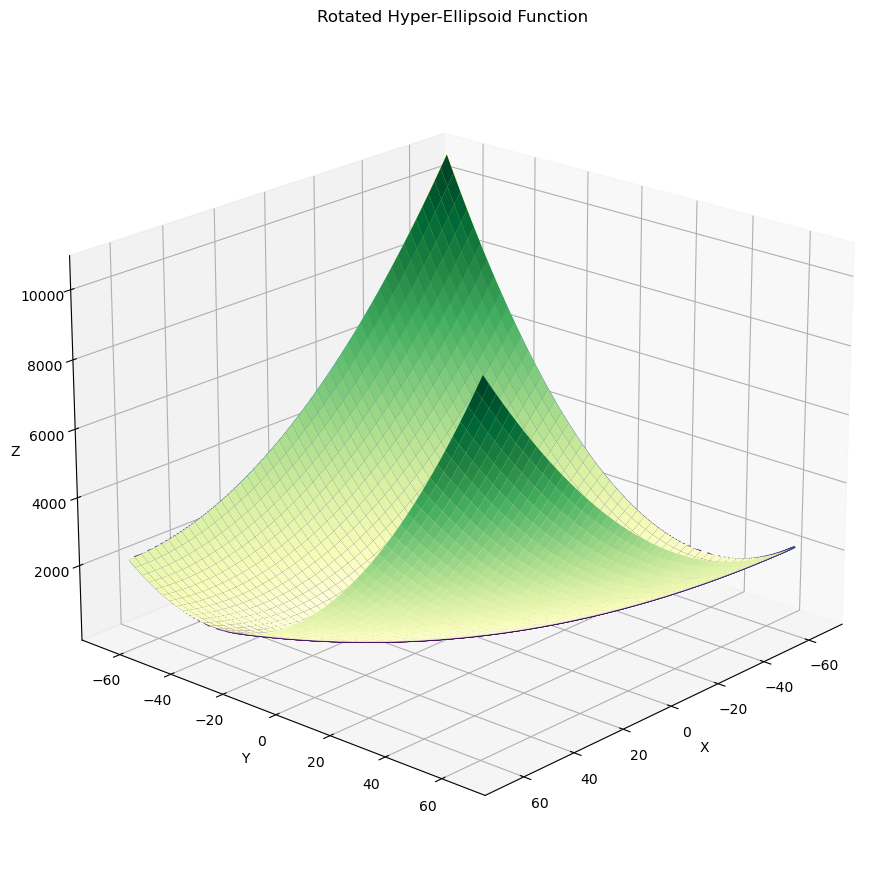
 
En esta tarea usted analizará la siguiente ecuación de un elipsoide sujeta a un parámetro $\lambda$, para observar el comportamiento de las iteraciones al aplicar los distintos métodos de resolución de sistemas de ecuaciones lineales vistos en clases.

Sea $\lambda>0$ y $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ definido por 

$$
    f(x,y) = \frac{1}{2}x^2 + \frac{\lambda}{2}y^2 + xy \ \ \forall \ x,y \in \mathbb{R}
$$


# Librerías (no utilizar liberías adicionales)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-danger"><b> No debe utilizar np.linalg.inv en su desarrollo para el calculo de las matrices inversas</b>
</div>

# Desarrollo

## Pregunta 1 (10 puntos): Análisis de la función

Hacer gráficos de la función para distintos valores del parámetro $\lambda$ y responder las siguientes preguntas:

- Gráficamente ¿Cuál es el mínimo o máximo de la función?
- ¿Qué ocurre con la función cuando el valor de $\lambda$ varía?


Para esta pregunta debe completar la función graficar_3d con la función $f(x,y)$ entregada en el enunciado, luego puede utilizarla con distintos valores de lambda para obtener los gráficos

In [20]:
def graficar_3d(lam):
    def f(x,y,lam):
        """
        Parameters
        ----------
        x    :float array
                x value
        y    :float array
                y value
        lam  :float
                lambda value
        Returns
        -------
        f_x   :float
                value of function f
        """
        func = lambda a, b, c: (0.5 * np.power(a, 2)) +  (c * 0.5 * np.power(b, 2)) + a*b       #a = x, b = y, c = lam
        f_x = func(x, y, lam)
        return f_x
    
    #No modificar las siguientes lineas
    x1= np.linspace(-65.536,65.536,500)
    x2= np.linspace(-65.536,65.536,500)
    r_min,r_max=-65.536,65.536
    x1,x2=np.meshgrid(x1,x2)
    results=f(x1,x2,lam)
    figure=plt.figure(figsize=(9,9))
    axis = plt.axes(projection="3d")
    axis.set_title('Rotated Hyper-Ellipsoid Function')
    axis.contour3D(x1, x2, results,450)
    axis.plot_surface(x1,x2,results)
    axis.view_init(21,42)
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_zlabel('Z')
    plt.show()

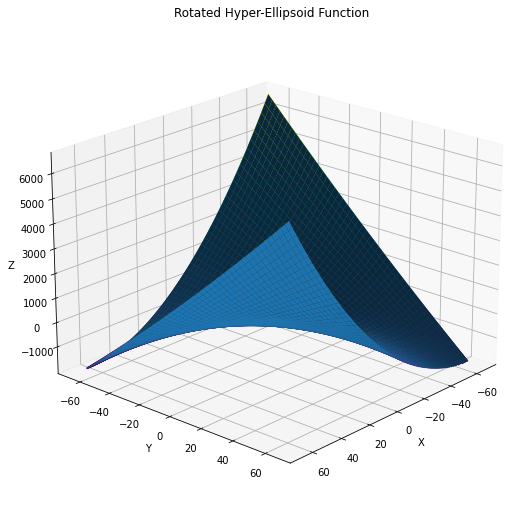

In [21]:
lam = 0.1
graficar_3d(lam)

En la gráfica podemos apreciar que para distintos valores de $\lambda$ la superficie cambia de forma, se va estirando a medida que se aumenta el valor $\lambda$, además de esto, la superficie se rota hasta formar una *U*.
<br>
Finalmente, para $\lambda$ > 1, el mínimo de la función está situado en 0 o cercano a este, mientras que el máximo depende del valor de $\lambda$ que escojamos.

## Pregunta 2 (30 puntos): Newton en $\mathbb{R}^n$

El objetivo es encontrar el mínimo de la función $f(x,y)$, para ello se le pide encontrar una iteración con el método de Newton para $\mathbb{R}^n$, es decir, llegar a una expresión de la forma:

$$
    x_{i+1} = x_i - J^{-1}(x_i) F(x_i)
$$

Donde se busca resolver $F(x) = 0$, para $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$ una función diferenciable, con $J^{-1}(x_i)$ la matriz Jacobiana inversa de $F$ evaluada en el punto $x_i$

### 2.1 (15 puntos) Desarrollo
Escriba aquí el desarrollo que realizó para obtener la iteración del método de Newton

Lo primero es calcular $F(x)$, la matriz de las derivadas parciales de la función $f(x)$:

$$
    F(x) =  \begin{bmatrix}
                \frac{\partial f(x, y)}{\partial x} \\
                \frac{\partial f(x, y)}{\partial y}
            \end{bmatrix}
$$
$$
    F(x) =  \begin{bmatrix}
                \frac{\partial }{\partial x} (\frac{1}{2} x^{2} + \frac{\lambda}{2} y^{2} + xy) \\
                \frac{\partial}{\partial y} (\frac{1}{2} x^{2} + \frac{\lambda}{2} y^{2} + xy)
            \end{bmatrix}
$$
$$
    F(x) =  \begin{bmatrix} 
                x + y \\
                \lambda y + x
            \end{bmatrix}
$$

Ahora es necesario calcular la matriz de derivadas parciales con respecto a $x$ e $y$ de $F(x)$, conocida como matriz Jacobiana $J(x)$:

$$
    J(x) =  \begin{bmatrix}
                \frac{\partial}{\partial x}(x + y) & \frac{\partial}{\partial y}(x + y) \\
                \frac{\partial}{\partial x}(\lambda y + x) & \frac{\partial}{\partial y}(\lambda y + x)
            \end{bmatrix}
$$
$$
    J(x) =  \begin{bmatrix}
                1 & 1 \\
                1 & \lambda
            \end{bmatrix}
$$

Ahora es necesario calcular la inversa de esta matriz de la siguiente manera:
$$
    J^{-1}(x) = \frac{1}{det(J(x))} \begin{bmatrix} \lambda & -1 \\ -1 & 1 \end{bmatrix}
$$
Donde det($J(x)$) está dado por $\lambda - 1$.
Finalmente, la expresión para la iteración del método de Newton estará dada por:
$$
    \begin{bmatrix} x_{i+1} \\ y_{i+1} \end{bmatrix} = \begin{bmatrix} x_{i} \\ y_{i} \end{bmatrix} - \frac{1}{\lambda - 1} \begin{bmatrix} \lambda & -1 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} x_{i} + y_{i} \\ \lambda y_{i} + x_{i} \end{bmatrix}
$$
Simplificando:
$$
    \begin{bmatrix} x_{i+1} \\ y_{i+1} \end{bmatrix} = \begin{bmatrix} x_{i} \\ y_{i} \end{bmatrix} - \frac{1}{\lambda - 1} \begin{bmatrix} (\lambda - 1)x_{i} + (\lambda + 1)y_{i} \\ (\lambda + 1)x_{i} + (\lambda - 1)y_{i} \end{bmatrix}
$$
Finalmente, la iteración de punto fijo queda de la siguiente manera:
$$
    x_{i+1} = x_{i} - \frac{1}{\lambda - 1}[(\lambda - 1)x_{i} + (\lambda + 1)y_{i}]
$$
$$
    y_{i+1} = y_{i} - \frac{1}{\lambda - 1}[(\lambda - 1)x_{i} + (\lambda + 1)y_{i}]
$$

**Solución:** 

### 2.2 (15 puntos) Implementación

Se le pide implementar las siguientes funciones

- **J_inv(x,ld)**, la cual calcula la inversa del Jacobiano $J^{-1}(x)$ dado un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **F(x,ld)**, la cual calcula la función $F(x)$ para un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **newton_rhapson(ld, x0, n_iter, J_inv, F)**, la cual realiza las iteraciones del método de Newton, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración . Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, las funciones $J^{-1}(x)$ y $F(x)$, una variable *ld* que corresponde al parámetro $\lambda$ y una cantidad de iteraciones.




In [22]:
def J_inv(x, ld):
    """
    Parameters
    ---------- 
    x        :  float array
                value for x,y
    ld       :  float
                value of parameter lambda
    Returns
    -------
    J_inv     : float array
                value of the inverse             
    """
    J = np.array([[1, 1], [1, ld]])
    Jadj =  np.array([[ld, -1], [-1, 1]])
    det = np.linalg.det(J)
    J_inv = (1 / det) * Jadj
    return J_inv

def F(x, ld):
    """
    Parameters
    ---------- 
    x       :  float array      np.array([(a,b), (a,b)])
                value for x,y
    ld      :  float
                value of parameter lambda
    Returns
    -------
    F       : float array
                value of the function F(x)           
    """
    # derivadas parciales de f(x, y)
    F = np.array([x[0] + x[1], (ld * x[1]) + x[0]])
    return F
    
def newton_rhapson(ld,x0, n_iter, J_inv,F):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of x during iterations
    """
    x = np.zeros((n_iter, 2, 1))
    x[0] = x0

    for i in range(n_iter - 1):
        x[i + 1] = x[i] - J_inv(x[i], ld) @ F(x[i], ld)

    return x

In [23]:
#Valor de prueba
newton_rhapson(10, np.random.rand(2,1), 50, J_inv,F)

array([[[ 3.72426232e-001],
        [ 9.13571525e-001]],

       [[-5.55111512e-017],
        [ 1.11022302e-016]],

       [[-1.23259516e-032],
        [ 2.46519033e-032]],

       [[-2.73691106e-048],
        [ 5.47382213e-048]],

       [[-6.07716336e-064],
        [ 1.21543267e-063]],

       [[-1.34940134e-079],
        [ 2.69880267e-079]],

       [[-2.99627287e-095],
        [ 5.99254573e-095]],

       [[-6.65306225e-111],
        [ 1.33061245e-110]],

       [[-1.47727658e-126],
        [ 2.95455316e-126]],

       [[-3.28021294e-142],
        [ 6.56042589e-142]],

       [[-7.28353587e-158],
        [ 1.45670717e-157]],

       [[-1.61726984e-173],
        [ 3.23453969e-173]],

       [[-3.59106044e-189],
        [ 7.18212087e-189]],

       [[-7.97375596e-205],
        [ 1.59475119e-204]],

       [[-1.77052949e-220],
        [ 3.54105898e-220]],

       [[-3.93136522e-236],
        [ 7.86273043e-236]],

       [[-8.72938436e-252],
        [ 1.74587687e-251]],

       [[-1.93

## Pregunta 3 (20) puntos): Jacobi y Gauss-Seidel

A continuación se utilizarán los métodos de Jacobi y Gauss-Seidel con el objetivo de encontrar los mínimos de la función $f(x,y)$ del enunciado. Para ello, usted debe plantear el problema como un sistema de ecuaciones lineales, es decir, de la forma $Ax=b$.

### 3.1 (10 puntos) Sistema de ecuaciones lineales
Escriba aquí su desarrollo para plantear el problema en su forma $Ax=b$

**Solución:**

Del método de Newton-Raphson tenemos lo siguiente:
$$
    x_{i+1} = x_{i} - J^{-1}(x_{i})F(x_{i})
$$
Sea $w(x_{i})$ tal que:
$$
    w(x_{i}) = J^{-1}F(x_{i})
$$
Ahora, para dejar todo de la forma $Ax = b$ multiplicamos por $J(x)$ a la izquierda en ambos lados de la ecuación:
$$
    J(x_{i})w(x_{i}) = F(x_{i})
$$
Siendo $A = J(x_{i})$, $x = w(x_{i})$ y $b = F(x_{i})$.
<br>
Luego descomponemos la matriz A, es decir $J(x_{i})$ en $L + D + U$ de la siguiente forma:
$$
    Ax = b
$$
$$
    (L + D + U)x = b
$$
$$
    Lx + Dx + Ux = b
$$
Despejando para Dx:
$$
    Dx = b - (L + U)x
$$
Finalmente, multiplicamos por $D^{-1}$ por la izquierda en ambos lados de la ecuación:
$$
    D^{-1}Dx = D^{-1}[b - (L + U)x]
$$
$$
    x = D^{-1}[b - (L + U)x]
$$
Lo cual nos entrega la iteración de punto fijo para el método de Jacobi de la siguiente forma:
$$
    x_{0} = "initial guess"
$$
$$
    x_{n+1} = D^{-1}[b - (L + U)x_{n}]
$$
Como la matriz $A = J(x)$ tenemos lo siguiente:
$$
    A = J(x) =  \begin{bmatrix}
                    1 & 1 \\
                    1 & \lambda
                \end{bmatrix}
$$
$$
    L = \begin{bmatrix}
            0 & 0 \\
            1 & 0
        \end{bmatrix}
$$
$$
    D = \begin{bmatrix}
            1 & 0 \\
            0 & \lambda
        \end{bmatrix}
$$
$$
    U = \begin{bmatrix}
            0 & 1 \\
            0 & 0
        \end{bmatrix}
$$
Por lo tanto, la iteración de punto fijo queda tal que:
$$
    \begin{bmatrix} x_{n+1} \\ y_{n+1} \end{bmatrix} = D^{-1}(b -\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} x_{n} \\ y_{n} \end{bmatrix})
$$
$$
    D^{-1} =    \begin{bmatrix}
                    1 & 0 \\
                    0 & \frac{1}{\lambda}
                \end{bmatrix}
$$

Ahora, para el método de Gauss-Seidel:
$$
    \begin{bmatrix} x_{n+1} \\ y_{n+1}\end{bmatrix} = (\begin{bmatrix} 1 & 0 \\ \frac{-1}{\lambda} & \frac{1}{\lambda} \end{bmatrix}) (b - \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} x_{n} \\ y_{n} \end{bmatrix})
$$

### 3.2 (5 puntos) Implementación del método de Jacobi

Se pide implementar la función **jacobi(ld, x0, n_iter, b)**  la cual realiza la iteración con el método de Jacobi, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [24]:
def jacobi(ld,x0,n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    D_inv = np.array([[1, 0], [0, (1 / ld)]])
    LU = np.array([[0, 1], [1, 0]])
    
    x = np.zeros((n_iter, 2, 1))
    x[0] = x0
    for i in range(n_iter - 1):
        x[i + 1] = D_inv @ (b - (LU @ x[i]))
    return x

In [25]:
#Valor de prueba
jacobi(10,np.random.rand(2,1), 50, np.zeros((2,1)))

array([[[ 4.92317812e-01],
        [ 2.61605042e-01]],

       [[-2.61605042e-01],
        [-4.92317812e-02]],

       [[ 4.92317812e-02],
        [ 2.61605042e-02]],

       [[-2.61605042e-02],
        [-4.92317812e-03]],

       [[ 4.92317812e-03],
        [ 2.61605042e-03]],

       [[-2.61605042e-03],
        [-4.92317812e-04]],

       [[ 4.92317812e-04],
        [ 2.61605042e-04]],

       [[-2.61605042e-04],
        [-4.92317812e-05]],

       [[ 4.92317812e-05],
        [ 2.61605042e-05]],

       [[-2.61605042e-05],
        [-4.92317812e-06]],

       [[ 4.92317812e-06],
        [ 2.61605042e-06]],

       [[-2.61605042e-06],
        [-4.92317812e-07]],

       [[ 4.92317812e-07],
        [ 2.61605042e-07]],

       [[-2.61605042e-07],
        [-4.92317812e-08]],

       [[ 4.92317812e-08],
        [ 2.61605042e-08]],

       [[-2.61605042e-08],
        [-4.92317812e-09]],

       [[ 4.92317812e-09],
        [ 2.61605042e-09]],

       [[-2.61605042e-09],
        [-4.92317812e

### 3.3 (5 puntos) Implementación del método de Gauss-Seidel

Se pide implementar la función **gauss_seidel**  la cual realiza la iteración con el método de Gauss-Seidel, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [26]:
def gauss_seidel(ld, x0, n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    LD_inv = np.array([[1, 0], [(-1 / ld), (1 / ld)]])
    U = np.array([[0, 1], [0, 0]])

    x = np.zeros((n_iter, 2, 1))
    x[0] = x0

    for i in range(n_iter - 1):
        x[i + 1] = LD_inv @ (b - (U @ x[i]))
    return x

In [27]:
#Valor de prueba
gauss_seidel(10, np.random.rand(2,1), 50, np.zeros((2,1)))

array([[[ 1.63020555e-02],
        [ 3.54718269e-01]],

       [[-3.54718269e-01],
        [ 3.54718269e-02]],

       [[-3.54718269e-02],
        [ 3.54718269e-03]],

       [[-3.54718269e-03],
        [ 3.54718269e-04]],

       [[-3.54718269e-04],
        [ 3.54718269e-05]],

       [[-3.54718269e-05],
        [ 3.54718269e-06]],

       [[-3.54718269e-06],
        [ 3.54718269e-07]],

       [[-3.54718269e-07],
        [ 3.54718269e-08]],

       [[-3.54718269e-08],
        [ 3.54718269e-09]],

       [[-3.54718269e-09],
        [ 3.54718269e-10]],

       [[-3.54718269e-10],
        [ 3.54718269e-11]],

       [[-3.54718269e-11],
        [ 3.54718269e-12]],

       [[-3.54718269e-12],
        [ 3.54718269e-13]],

       [[-3.54718269e-13],
        [ 3.54718269e-14]],

       [[-3.54718269e-14],
        [ 3.54718269e-15]],

       [[-3.54718269e-15],
        [ 3.54718269e-16]],

       [[-3.54718269e-16],
        [ 3.54718269e-17]],

       [[-3.54718269e-17],
        [ 3.54718269e

## Pregunta 4 (20 puntos): Experimentos

### 4.1 Obtención Normas (15 puntos)

En esta pregunta se van a comparar los resultados de los 3 métodos implementados. Para ello se pide implementar de forma vectorizada la función *method_norm*, la cual recibe los siguientes parámetros:

- ld: Valor de $\lambda$
- initial val: valor inicial para los métodos iterativos
- n_iter: cantidad de iteraciones a realizar
- b: vector $b$ para los métodos de jacobi y gauss-seidel
- J_inv: Función que calcular la inversa del jacobiano para el método de newton
- F: función a resolver con el método de newton

La función debe retornar 3 numpy array (jacobi_norm, newton_norm, gauss_norm) que obtienen la norma del vector x que retornan los métodos implementados en las preguntas anteriores. Por ejemplo, jacobi_norm es un np.array que se obtiene al aplicar la norma a cada uno de los valores del vector x, el cual es el resultado de llamar a la función *jacobi*


<div class="alert alert-block alert-info"><a>puede utilizar la función np.linalg.norm() de numpy </a></div>

In [28]:
def method_norm(ld, initial_val, n_iter, b, J_inv,F):
    """
    Parameters
    ---------- 
    ld           :  float
                    value of parameter lambda
    initial_val  : float array
                    Initial value for x,y
    
    n_iter       : int
                    Number of iterations
    b            : float array
                    value of array b
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    Returns
    -------
    jacobi_norm  : float array
                    value of the norm of the array x during jacobi method
    newton_norm  : float array
                    value of the norm of the array x during newton method
    gauss_norm  : float array
                    value of the norm of the array x during gauss-seidel method
    """
    jacobi_norm = np.zeros(n_iter)
    newton_norm = np.zeros(n_iter)
    gauss_norm = np.zeros(n_iter)

    for i in range(n_iter - 1):
        jacobi_norm[i] = np.linalg.norm(jacobi(ld,initial_val, n_iter, b))
        newton_norm[i] = np.linalg.norm(newton_rhapson(ld, initial_val, n_iter, J_inv,F))
        gauss_norm[i] = np.linalg.norm(gauss_seidel(ld, initial_val, n_iter, b))
    
    return jacobi_norm,newton_norm, gauss_norm

### 4.2 Experimentos (5 puntos)
A continuación se pide realizar experimentos con los siguientes valores de $\lambda = \{2,10,1000\}$ sobre cada uno de los métodos implementados en las preguntas anteriores. Para ello elija un punto inicial aleatorio e inicialice los métodos desde el mismo punto, con 20 iteraciones.

In [29]:
initial_val = np.random.rand(2, 1)
ld = np.array([2, 10, 1000])
n_iter = 20

aux = np.zeros((3, 3, n_iter))
#Aquí va su código
for i in range(ld.size):
    aux[i] = method_norm(ld[i], initial_val, n_iter, np.zeros((2, 1)), J_inv, F)
aux # array con las normas para ld = 2, 10, 1000

array([[[1.14037539, 1.14037539, 1.14037539, 1.14037539, 1.14037539,
         1.14037539, 1.14037539, 1.14037539, 1.14037539, 1.14037539,
         1.14037539, 1.14037539, 1.14037539, 1.14037539, 1.14037539,
         1.14037539, 1.14037539, 1.14037539, 1.14037539, 0.        ],
        [0.72208976, 0.72208976, 0.72208976, 0.72208976, 0.72208976,
         0.72208976, 0.72208976, 0.72208976, 0.72208976, 0.72208976,
         0.72208976, 0.72208976, 0.72208976, 0.72208976, 0.72208976,
         0.72208976, 0.72208976, 0.72208976, 0.72208976, 0.        ],
        [1.11376444, 1.11376444, 1.11376444, 1.11376444, 1.11376444,
         1.11376444, 1.11376444, 1.11376444, 1.11376444, 1.11376444,
         1.11376444, 1.11376444, 1.11376444, 1.11376444, 1.11376444,
         1.11376444, 1.11376444, 1.11376444, 1.11376444, 0.        ]],

       [[0.98152015, 0.98152015, 0.98152015, 0.98152015, 0.98152015,
         0.98152015, 0.98152015, 0.98152015, 0.98152015, 0.98152015,
         0.98152015, 0.981520

Luego observe cuales son los puntos en la última iteración en cada uno de los métodos

In [34]:
#Aquí va su código
metodo_jacobi = np.zeros((3, 2, 1))
metodo_gauss = np.zeros((3, 2, 1))
metodo_newton = np.zeros((3, 2, 1))

for i in range(ld.size):
    metodo_jacobi[i] = jacobi(ld[i], initial_val, n_iter, np.zeros((2, 1)))[-1]
    metodo_gauss[i] = gauss_seidel(ld[i], initial_val, n_iter, np.zeros((2,1)))[-1]
    metodo_newton[i] = newton_rhapson(ld[i], initial_val, n_iter, J_inv, F)[-1]

In [35]:
metodo_jacobi

array([[[-1.28288436e-03],
        [-2.92934641e-04]],

       [[-6.56836793e-10],
        [-2.99965073e-11]],

       [[-6.56836793e-28],
        [-2.99965073e-31]]])

In [36]:
metodo_gauss

array([[[-2.50563352e-06],
        [ 1.25281676e-06]],

       [[-6.56836793e-19],
        [ 6.56836793e-20]],

       [[-6.56836793e-55],
        [ 6.56836793e-58]]])

In [37]:
metodo_newton

array([[[ 0.00000000e+000],
        [ 0.00000000e+000]],

       [[ 3.73305447e-301],
        [ 1.86652724e-301]],

       [[-5.01042090e-293],
        [ 1.50312627e-292]]])

## Pregunta 5 (10 puntos): Conclusiones

Finalmente, se pide que concluya respecto a los resultados obtenidos.

- ¿Qué método obtuvo mejor resultado y por qué?
- ¿Qué ocurre al variar el parámetro $\lambda$? ¿Llegaron los métodos al mínimo esperado?

Echando un vistazo a los resultados de los métodos y comparandolos entre si, podemos darnos cuenta de que el método que converge más rápido hacia el mínimo es el método de *Newton-Raphson*, ya que le toma menos iteraciones en llegar a un valor cercano a 0.
<br>
Al aumentar nuestro $\lambda$ podemos ver que la precisión aumenta en todos los métodos, siendo nuevamente el método de *Newton-Raphson* el más notorio. Finalmente, todos los métodos convergen al mínimo esperado, pero como se expresó antes, algunos lo hacen más rápido que otros.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57673af8-dd90-4dbc-a4bd-4284b8b1e209' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>